<a href="https://colab.research.google.com/github/visiont3lab/deep-learning-course/blob/main/colab/Understand-Convolution-Dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents

* How to read, transform and plot images (pillow library)
* Image Generator desin for large dataset
* Convolution - Max Pooling (Padding, Stride)
* Convolutional Neural Network

Materials
* [Computer vision using Pytorch](https://www.mygreatlearning.com/blog/computer-vision-using-pytorch/)
* [Convolutional Neural Network Lenet](https://colab.research.google.com/github/d2l-ai/d2l-pytorch-colab/blob/master/chapter_convolutional-neural-networks/lenet.ipynb)
* [Data Loader](https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel)
* [Pytorch Cifar](https://colab.research.google.com/drive/1B5KQvPySqYEa6XicRHdOwgv8fN1BrCgQ)

## Setup

In [1]:
!rm -rf data/ arcolinux-wallpapers/

In [2]:
# Download test wallpaper images
!git clone https://github.com/arcolinux/arcolinux-wallpapers.git
!mkdir -p data/
!mv arcolinux-wallpapers/usr/share/backgrounds/arcolinux data/
!mv data/arcolinux data/backgrounds

Cloning into 'arcolinux-wallpapers'...
remote: Enumerating objects: 299, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 299 (delta 35), reused 89 (delta 19), pack-reused 193
Receiving objects: 100% (299/299), 142.47 MiB | 37.96 MiB/s, done.
Resolving deltas: 100% (80/80), done.


## Intro to Computer Vision

In [ ]:
!pip install opencv-python pillow 

(128, 128)


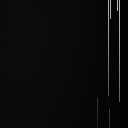

In [110]:
import cv2
import numpy as np
from PIL import Image

im = cv2.imread("/content/data/backgrounds/arco-login-plasma.jpg", cv2.IMREAD_GRAYSCALE) # IMREAD_COLOR
#im = cv2.imread("/content/data/backgrounds/arco-login-plasma.jpg", cv2.IMREAD_COLOR) # BGR (Blue, Green, Red) 
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (128,128))

#b = im[:,:,0]
#g = im[:,:,1]
#r = im[:,:,2]
#t = np.stack([r,g,b])  # 3x128x128
#t = np.transpose(t, (1, 2, 0))

print(im.shape)

# Visualization RGB
display(Image.fromarray(im)) # 0-255    

galaxy-2560x1600.png


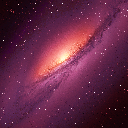

In [120]:
import os

def vis_image(path):
  im = cv2.imread(path, cv2.IMREAD_COLOR) # IMREAD_COLOR
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  im = cv2.resize(im, (128,128))
  display(Image.fromarray(im)) # 0-255

folder_path = "data/backgrounds"
for name in os.listdir(folder_path):
  print(name)
  #path = "data/backgrounds/"+name
  path = os.path.join(folder_path,name )
  vis_image(path)
  break

## Data Loader

torch.Size([1, 128, 128])


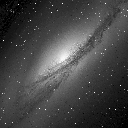

In [116]:
# Data loader
#----

import torch
import os
import cv2
import torchvision

# Dataset eleement  --> torch.utils.data

class GetData(torch.utils.data.Dataset):
  def __init__(self, folder_path):
    self.folder_path = folder_path
    self.names = os.listdir(folder_path)

  def __getitem__(self,idx):
    path = os.path.join(self.folder_path, self.names[idx])
    im = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # IMREAD_COLOR
    #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (128,128)) 
    
    # Normalize 0-1
    t = torchvision.transforms.ToTensor()(im)
   
    return t

  def __len__(self):
    return len(self.names)


folder_path = "data/backgrounds"
train_ds = GetData(folder_path)

# Dataset
for x in train_ds:
  print(x.shape)
  im = torchvision.transforms.ToPILImage()(x)
  display(im)
  #display(Image.fromarray(x)) # 0-255
  break


torch.Size([3, 1, 128, 128])


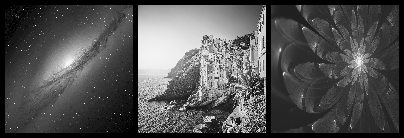

torch.Size([3, 1, 128, 128])


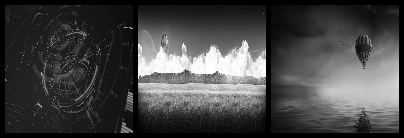

torch.Size([3, 1, 128, 128])


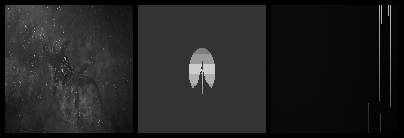

torch.Size([3, 1, 128, 128])


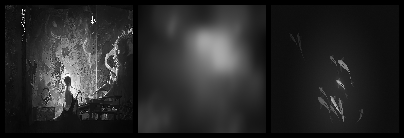

In [117]:
# Data Loader
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=3)
for x in train_dl:
  print(x.shape)
  batch_grid = torchvision.utils.make_grid(x, nrow=5, padding=5)
  im = torchvision.transforms.ToPILImage()(batch_grid)
  display(im)

## Network Convolution

torch.Size([3, 1, 128, 128])
torch.Size([3, 1, 8, 8])


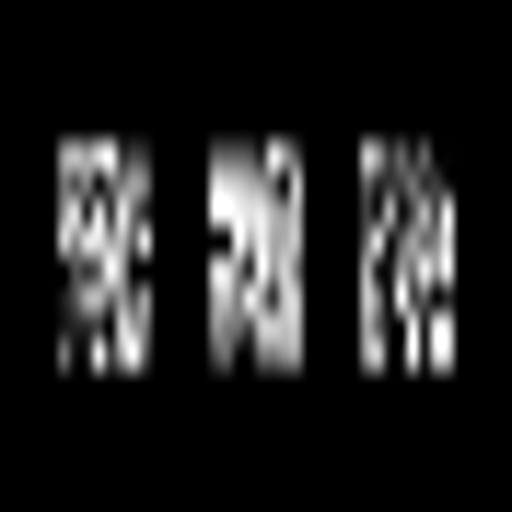

In [118]:
filter1 = np.array( [
                    [1,0],
                    [0,0],
                ])
filter2 = np.array( [
                    [1,1],
                    [0,1],
                ])

class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(2,2), stride=(2,2), padding=(0,0))
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.conv2 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(2,2), stride=(2,2), padding=(0,0))
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        
        self.conv1.weight = torch.nn.Parameter( torch.tensor(filter1).type(torch.float32).unsqueeze(0).unsqueeze(0) )
        self.conv2.weight = torch.nn.Parameter( torch.tensor(filter2).type(torch.float32).unsqueeze(0).unsqueeze(0) )

    def forward(self,x):
      x = torch.relu(self.conv1(x))
      x = self.maxpool1(x)
      x = torch.relu(self.conv2(x))
      x = self.maxpool2(x)
      return x

n = MyNet()

for x in train_dl:
  print(x.shape)
  y = n(x)
  print(y.shape)
  batch_grid = torchvision.utils.make_grid(y, nrow=5, padding=5)
  im = torchvision.transforms.ToPILImage()(batch_grid)
  im = im.resize((512,512))
  display(im)
  break

### Pytorch convolutions

In [121]:
from torch import nn
import numpy as np

im = np.array([
                [ 10,  11,   9,   3 ],
                [  2,  123,  4,   0 ] ,
                [ 45,  237, 23,  99 ],
                [ 20,  67,  22, 255 ],
            ])

filter = np.array( [
                    [1,0],
                    [1,0],
                    #[0,1],
                ])

# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

im = torch.tensor(im).type(torch.float32).unsqueeze(0).unsqueeze(0)
print(im.shape)
conv = nn.Conv2d(in_channels=1,out_channels=1, kernel_size=(2 ,2), stride=(2, 2), padding=(0,0),bias=False) # height wight
print("\n--- Weights Random")
print(conv.weight)
print("\n--- Weights Choosen")
conv.weight = torch.nn.Parameter( torch.tensor(filter).type(torch.float32).unsqueeze(0).unsqueeze(0) )
print(conv.weight)
print("\n-- Bias")
print(conv.bias)
y = conv.forward(im)
print("\n-- Output")
print(y)

torch.Size([1, 1, 4, 4])

--- Weights Random
Parameter containing:
tensor([[[[ 0.0660, -0.1143],
          [ 0.4217, -0.0872]]]], requires_grad=True)

--- Weights Choosen
Parameter containing:
tensor([[[[1., 0.],
          [1., 0.]]]], requires_grad=True)

-- Bias
None

-- Output
tensor([[[[12., 13.],
          [65., 45.]]]], grad_fn=<ConvolutionBackward0>)
